In [1]:
import pandas as pd

In [2]:
emotion_df = pd.read_csv("emotion.csv")
emotion_df.head()

,movie_id,image_seq,angry,disgust,fear,happy,sad,surprise,neutral,dominant_emotion
0,93663f94-bf0a-4ce8-a29a-a5236cc7fe6a,0,4.31735,0.000594,2.879790,1.65035,2.779980,0.600814,87.77110,neutral
1,93663f94-bf0a-4ce8-a29a-a5236cc7fe6a,1,53.22530,2.981640,12.736800,1.52347,1.051320,27.216800,1.26462,angry
2,93663f94-bf0a-4ce8-a29a-a5236cc7fe6a,2,8.79651,0.029468,2.968160,16.83150,39.884600,0.279335,31.21050,sad
3,93663f94-bf0a-4ce8-a29a-a5236cc7fe6a,3,9.45303,0.106778,1.553080,20.93010,3.503870,0.909426,63.54370,neutral
4,93663f94-bf0a-4ce8-a29a-a5236cc7fe6a,4,56.00020,0.000004,0.162231,5.58358,0.197026,12.807600,25.24940,angry


In [3]:
# Select relevant columns for summary statistics
emotion_scores = emotion_df[['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']]

# Calculate summary statistics
summary_stats = emotion_scores.describe()

# Print the summary statistics
print(summary_stats)

           angry       disgust       fear      happy        sad   surprise  \
count  87.000000  8.700000e+01  87.000000  87.000000  87.000000  87.000000   
mean   14.451059  6.168965e-01  18.382797   5.865318  13.575324   8.744969   
std    18.544205  2.679399e+00  25.073562  11.237819  19.787221  19.621163   
min     0.164384  2.400910e-10   0.079219   0.000005   0.000073   0.000008   
25%     1.867450  8.769180e-05   1.862945   0.143215   1.845405   0.210637   
50%     6.412790  3.443590e-03   6.366870   1.476330   5.578010   0.970922   
75%    18.765500  6.486260e-02  21.010100   5.569355  14.056700   6.524355   
max    71.172500  2.150890e+01  94.981800  66.222300  91.563600  97.834400   

         neutral  
count  87.000000  
mean   38.363648  
std    33.468718  
min     0.000117  
25%     8.035385  
50%    28.221400  
75%    71.227450  
max    97.823000  


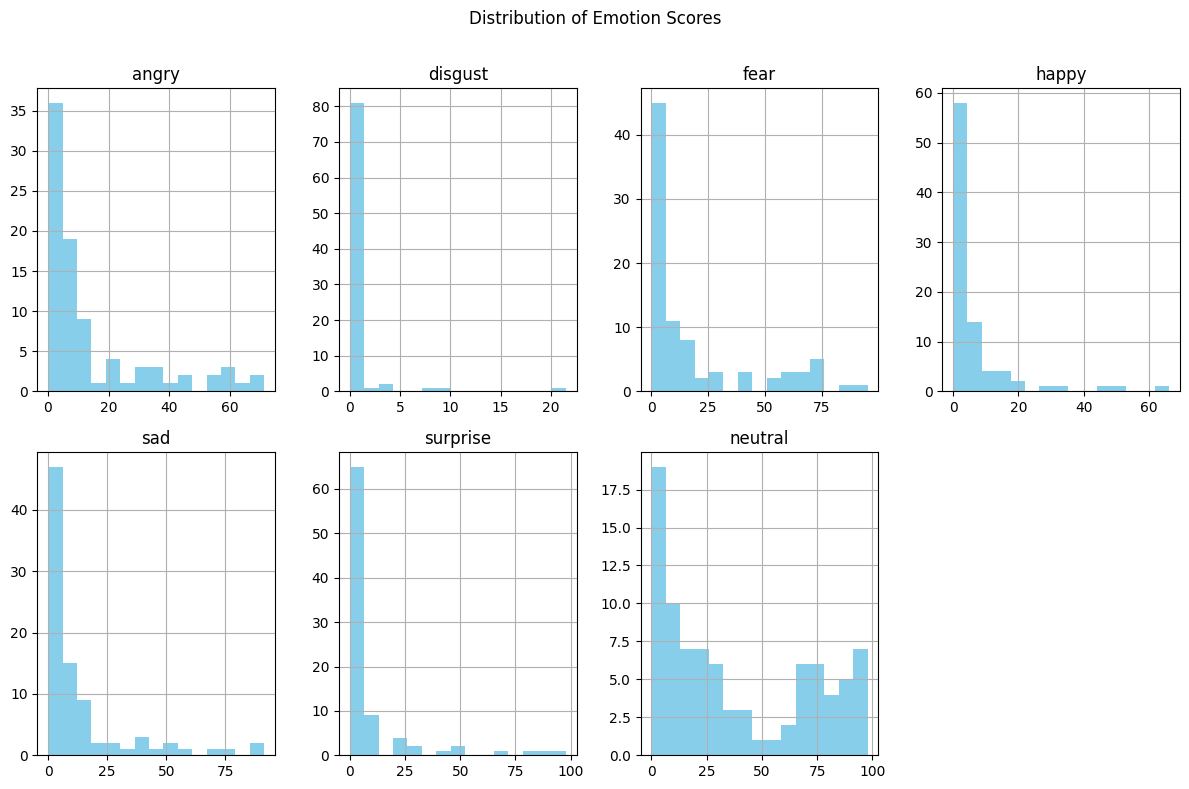

In [4]:
import matplotlib.pyplot as plt

# Plotting the distribution of emotion scores
emotion_scores.hist(bins=15, figsize=(12, 8), layout=(2, 4), color='skyblue')
plt.suptitle('Distribution of Emotion Scores')
plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust subplot layout
plt.show()

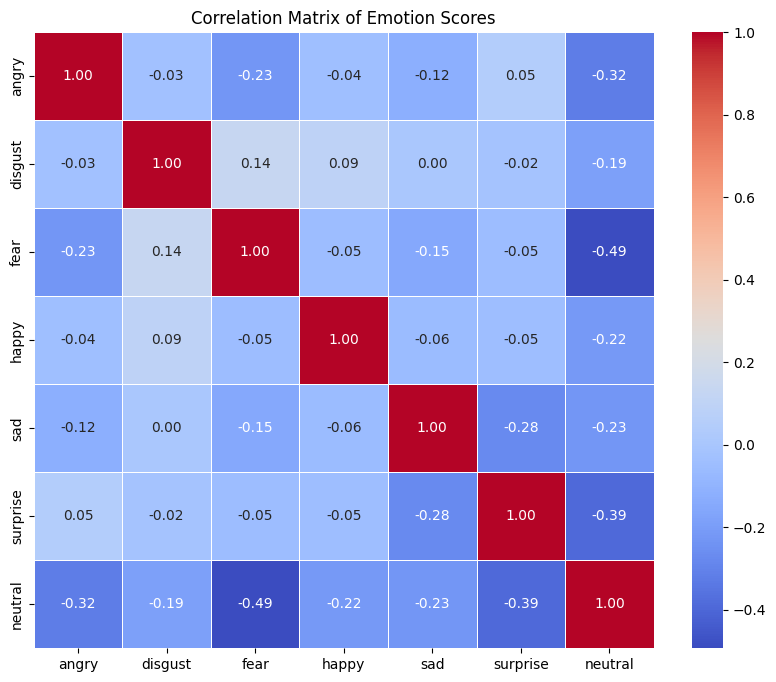

In [5]:
import seaborn as sns
import numpy as np

# Calculate the correlation matrix
correlation_matrix = emotion_scores.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Emotion Scores')
plt.show()


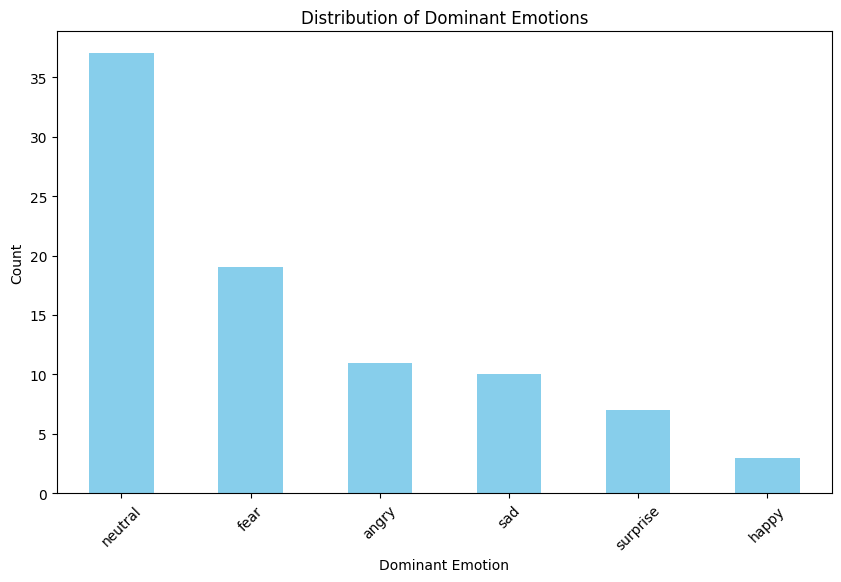

In [8]:
# Count the occurrences of each dominant emotion
dominant_emotion_counts = emotion_df['dominant_emotion'].value_counts()

# Plotting the distribution of dominant emotions
plt.figure(figsize=(10, 6))
dominant_emotion_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Dominant Emotion')
plt.ylabel('Count')
plt.title('Distribution of Dominant Emotions')
plt.xticks(rotation=45)
plt.show()

In [10]:
gaze_df = pd.read_csv("gaze.csv")
gaze_df.head()

,movie_id,image_seq,gaze,blink,eye_offset
0,93663f94-bf0a-4ce8-a29a-a5236cc7fe6a,1,1,0,6.2253
1,93663f94-bf0a-4ce8-a29a-a5236cc7fe6a,2,1,0,22.7274
2,93663f94-bf0a-4ce8-a29a-a5236cc7fe6a,3,1,0,2.5704
3,93663f94-bf0a-4ce8-a29a-a5236cc7fe6a,4,1,0,21.1097
4,93663f94-bf0a-4ce8-a29a-a5236cc7fe6a,5,1,0,1.8453


In [11]:
# Calculate summary statistics
summary_stats_gaze = gaze_df[['gaze', 'blink', 'eye_offset']].describe()

# Print the summary statistics
print(summary_stats_gaze)

            gaze  blink  eye_offset
count  88.000000   88.0   88.000000
mean    0.625000    0.0   15.801362
std     0.486897    0.0   17.858517
min     0.000000    0.0  -33.465500
25%     0.000000    0.0    0.293050
50%     1.000000    0.0   19.694100
75%     1.000000    0.0   28.332000
max     1.000000    0.0   65.027600


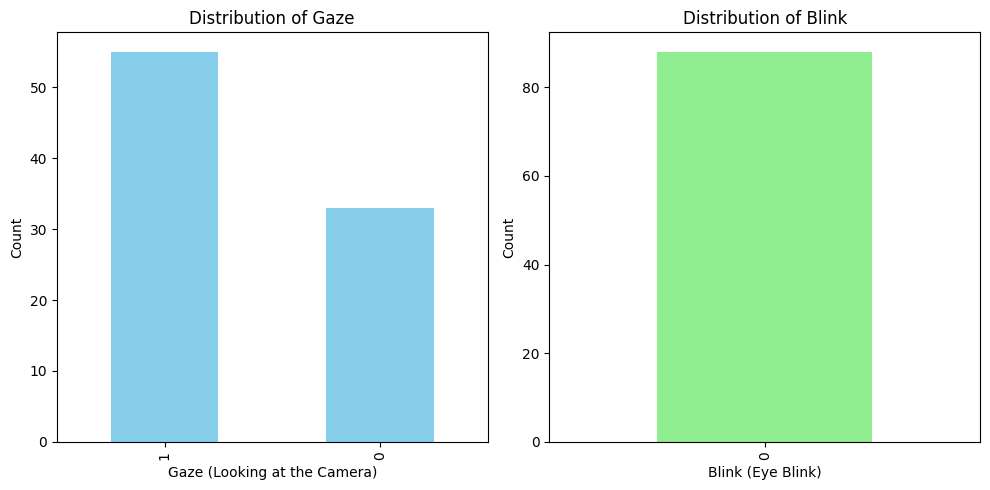

In [12]:
plt.figure(figsize=(10, 5))

# Distribution of gaze
plt.subplot(1, 2, 1)
gaze_df['gaze'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Gaze (Looking at the Camera)')
plt.ylabel('Count')
plt.title('Distribution of Gaze')

# Distribution of blink
plt.subplot(1, 2, 2)
gaze_df['blink'].value_counts().plot(kind='bar', color='lightgreen')
plt.xlabel('Blink (Eye Blink)')
plt.ylabel('Count')
plt.title('Distribution of Blink')

plt.tight_layout()
plt.show()

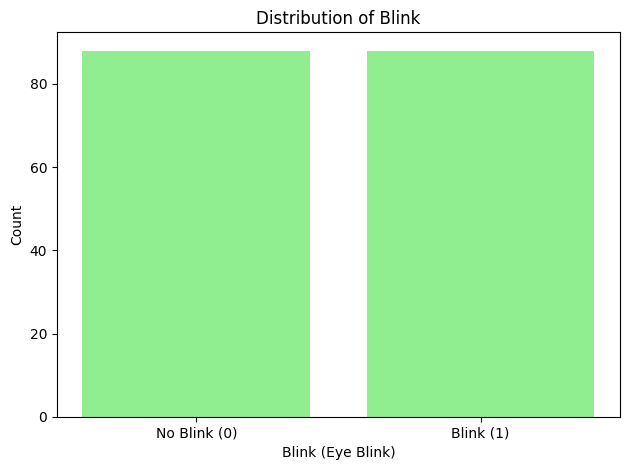

In [14]:
# Counting occurrences of 0 (No Blink) and 1 (Blink) in 'blink' column
blink_counts = gaze_df['blink'].value_counts()

# Plotting the distribution of blink
plt.bar(['No Blink (0)', 'Blink (1)'], blink_counts, color='lightgreen')
plt.xlabel('Blink (Eye Blink)')
plt.ylabel('Count')
plt.title('Distribution of Blink')

plt.tight_layout()
plt.show()

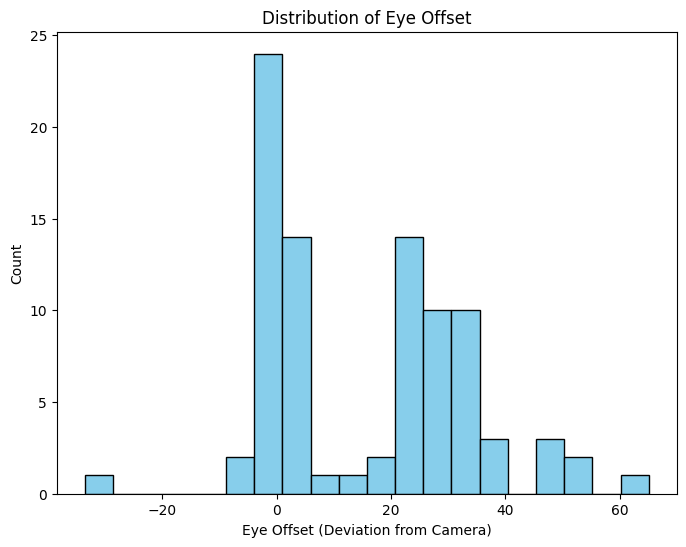

In [15]:
# Plotting the distribution of eye_offset
plt.figure(figsize=(8, 6))
plt.hist(gaze_df['eye_offset'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Eye Offset (Deviation from Camera)')
plt.ylabel('Count')
plt.title('Distribution of Eye Offset')
plt.show()


In [19]:
metadata_df= pd.read_csv("metadata.csv")
metadata_df.head()

,movie_id,image_seq,participant_id,elapsed_time,upload_time,distance
0,93663f94-bf0a-4ce8-a29a-a5236cc7fe6a,6,e2aa9258-47a5-46ab-9c5c-283460f7a807,7.0,2023-09-17 07:58:15,0.0
1,93663f94-bf0a-4ce8-a29a-a5236cc7fe6a,7,e2aa9258-47a5-46ab-9c5c-283460f7a807,8.0,2023-09-17 07:58:15,0.0
2,93663f94-bf0a-4ce8-a29a-a5236cc7fe6a,11,e2aa9258-47a5-46ab-9c5c-283460f7a807,12.0,2023-09-17 07:58:15,0.0
3,93663f94-bf0a-4ce8-a29a-a5236cc7fe6a,13,e2aa9258-47a5-46ab-9c5c-283460f7a807,14.0,2023-09-17 07:58:15,0.0
4,93663f94-bf0a-4ce8-a29a-a5236cc7fe6a,14,e2aa9258-47a5-46ab-9c5c-283460f7a807,15.0,2023-09-17 07:58:15,0.0


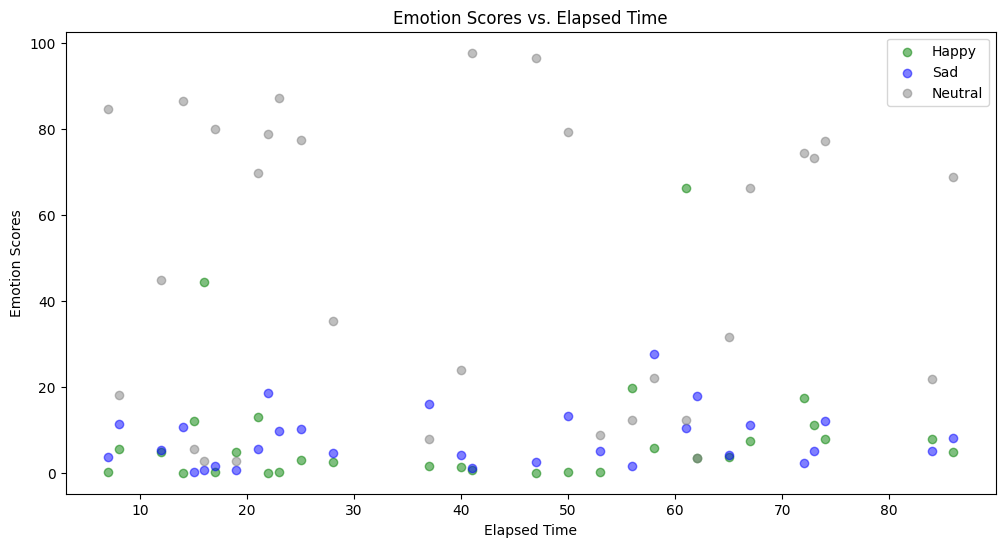

In [21]:
# Assuming 'metadata_df' is the DataFrame containing the metadata dataset
# Replace it with the actual DataFrame name you have

# Merging the metadata and emotion data on image_seq
merged_df = pd.merge(metadata_df, emotion_df, on='image_seq')

# Plotting the relationship between elapsed_time and emotion scores
plt.figure(figsize=(12, 6))
plt.scatter(merged_df['elapsed_time'], merged_df['happy'], alpha=0.5, label='Happy', color='green')
plt.scatter(merged_df['elapsed_time'], merged_df['sad'], alpha=0.5, label='Sad', color='blue')
plt.scatter(merged_df['elapsed_time'], merged_df['neutral'], alpha=0.5, label='Neutral', color='gray')
plt.xlabel('Elapsed Time')
plt.ylabel('Emotion Scores')
plt.legend()
plt.title('Emotion Scores vs. Elapsed Time')
plt.show()

In [22]:
# Assuming 'emotion_df' is the DataFrame containing the emotion dataset
# Assuming 'gaze_df' is the DataFrame containing the gaze dataset

# Merge emotion and gaze datasets on 'image_seq'
merged_emotion_gaze_df = pd.merge(emotion_df, gaze_df, on='image_seq')

# Display the merged dataset
print("Merged Emotion and Gaze Dataset:")
print(merged_emotion_gaze_df.head())

Merged Emotion and Gaze Dataset:
                             movie_id_x  image_seq      angry       disgust  \
0  93663f94-bf0a-4ce8-a29a-a5236cc7fe6a          1  53.225300  2.981640e+00   
1  93663f94-bf0a-4ce8-a29a-a5236cc7fe6a          2   8.796510  2.946810e-02   
2  93663f94-bf0a-4ce8-a29a-a5236cc7fe6a          3   9.453030  1.067780e-01   
3  93663f94-bf0a-4ce8-a29a-a5236cc7fe6a          4  56.000200  4.152410e-06   
4  93663f94-bf0a-4ce8-a29a-a5236cc7fe6a          5   0.635349  7.417910e-09   

        fear      happy        sad   surprise   neutral dominant_emotion  \
0  12.736800   1.523470   1.051320  27.216800   1.26462            angry   
1   2.968160  16.831500  39.884600   0.279335  31.21050              sad   
2   1.553080  20.930100   3.503870   0.909426  63.54370          neutral   
3   0.162231   5.583580   0.197026  12.807600  25.24940            angry   
4   0.218106   0.003218   1.955240   0.012085  97.17600          neutral   

                             movie_

In [23]:
# Calculate summary statistics for relevant columns
summary_stats_merged = merged_emotion_gaze_df[['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral', 'gaze', 'blink', 'eye_offset']].describe()

# Print the summary statistics
print(summary_stats_merged)

           angry       disgust       fear      happy        sad   surprise  \
count  79.000000  7.900000e+01  79.000000  79.000000  79.000000  79.000000   
mean   15.249207  6.606278e-01  18.525961   6.081116  13.773940   7.991664   
std    19.153572  2.805503e+00  25.963918  11.640849  19.865521  18.273123   
min     0.164384  2.400910e-10   0.079219   0.000005   0.000073   0.000008   
25%     2.082490  7.878110e-05   1.862945   0.167707   1.969045   0.161883   
50%     6.845980  9.112210e-03   6.134680   1.476330   5.918730   0.970922   
75%    20.625250  8.562455e-02  17.209750   5.569355  14.056700   6.524355   
max    71.172500  2.150890e+01  94.981800  66.222300  91.563600  97.834400   

         neutral       gaze  blink  eye_offset  
count  79.000000  79.000000   79.0   79.000000  
mean   37.717494   0.594937    0.0   15.987982  
std    32.738444   0.494041    0.0   17.990618  
min     0.000117   0.000000    0.0  -33.465500  
25%     8.584915   0.000000    0.0    0.510150  
50%

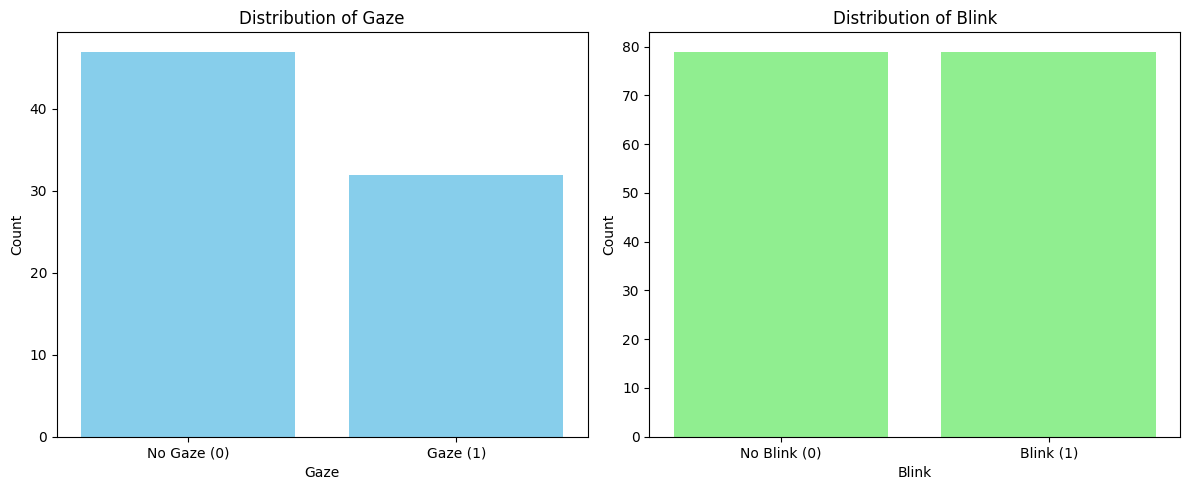

In [24]:
# Counting occurrences of 0 (No Gaze) and 1 (Gaze) in 'gaze' column
gaze_counts = merged_emotion_gaze_df['gaze'].value_counts()

# Counting occurrences of 0 (No Blink) and 1 (Blink) in 'blink' column
blink_counts = merged_emotion_gaze_df['blink'].value_counts()

# Plotting the distribution of gaze and blink
plt.figure(figsize=(12, 5))

# Distribution of gaze
plt.subplot(1, 2, 1)
plt.bar(['No Gaze (0)', 'Gaze (1)'], gaze_counts, color='skyblue')
plt.xlabel('Gaze')
plt.ylabel('Count')
plt.title('Distribution of Gaze')

# Distribution of blink
plt.subplot(1, 2, 2)
plt.bar(['No Blink (0)', 'Blink (1)'], blink_counts, color='lightgreen')
plt.xlabel('Blink')
plt.ylabel('Count')
plt.title('Distribution of Blink')

plt.tight_layout()
plt.show()

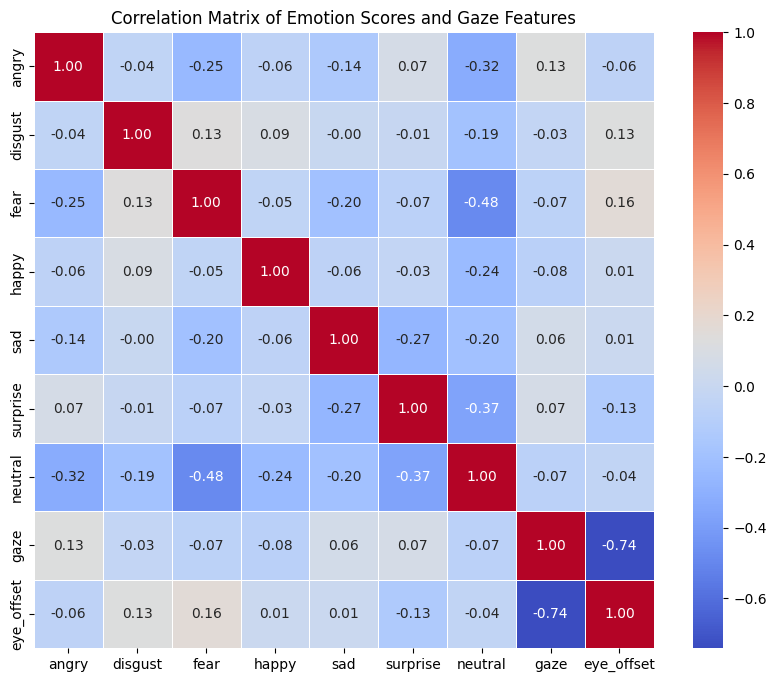

In [26]:
# Calculate the correlation matrix
correlation_matrix = merged_emotion_gaze_df[['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral', 'gaze', 'eye_offset']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Emotion Scores and Gaze Features')
plt.show()

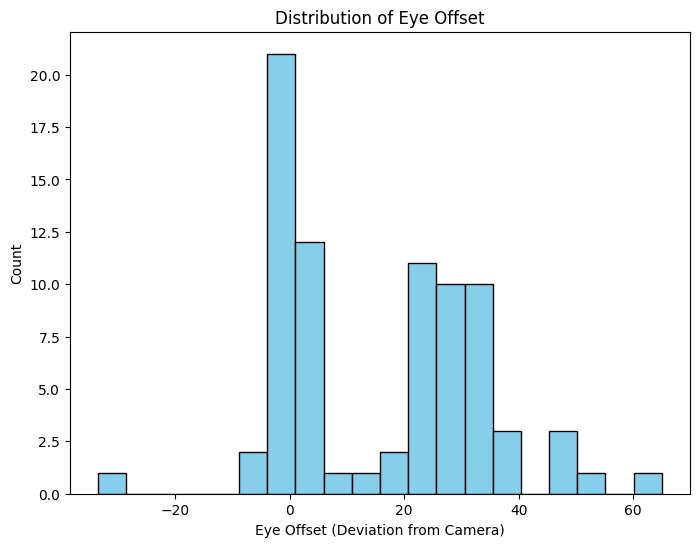

In [27]:
# Plotting the distribution of eye_offset
plt.figure(figsize=(8, 6))
plt.hist(merged_emotion_gaze_df['eye_offset'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Eye Offset (Deviation from Camera)')
plt.ylabel('Count')
plt.title('Distribution of Eye Offset')
plt.show()

In [30]:
transcript_scores_df = pd.read_csv("1.csv")
transcript_scores_df.head()

,id,seek,start,end,text,tokens,temperature,avg_logprob,compression_ratio,no_speech_prob,positive,negative,neutral,confident,hesitant,concise,enthusiastic,speech_speed
0,0,0,0.00,5.56,"Hello, I am Jeffrey Shepherd and I am current...","[50364, 2425, 11, 286, 669, 1587, 84, 2938, 49...",0.0,-0.447179,1.651235,0.63588,0.580265,0.152281,0.267454,0.846701,0.845698,0.635805,0.647783,2.517986
1,1,0,5.56,9.60,IIM Coikode. I have completed my B.Tech in Bi...,"[50642, 286, 6324, 3066, 1035, 1429, 13, 286, ...",0.0,-0.447179,1.651235,0.63588,0.550327,0.189263,0.260410,0.679283,0.733701,0.544145,0.417390,3.217822
2,2,0,9.60,14.48,"Technology Kolkata, followed by my M.Tech fro...","[50844, 15037, 26137, 74, 3274, 11, 6263, 538,...",0.0,-0.447179,1.651235,0.63588,0.639860,0.111150,0.248990,0.902729,0.834620,0.715861,0.700062,2.868852
3,3,0,14.48,18.48,of three years in the regulatory affairs doma...,"[51088, 295, 1045, 924, 294, 264, 18260, 17478...",0.0,-0.447179,1.651235,0.63588,0.441894,0.399186,0.158919,0.774308,0.813044,0.522462,0.279916,3.750000
4,4,0,18.48,23.28,"as a medical writer in Ciro Klein Farm, Mumba...","[51288, 382, 257, 4625, 9936, 294, 383, 5182, ...",0.0,-0.447179,1.651235,0.63588,0.236254,0.532010,0.231735,0.286049,0.561375,0.334381,0.197305,3.541667


In [31]:
# Select relevant columns for summary statistics
numerical_scores = transcript_scores_df[['positive', 'negative', 'neutral', 'confident', 'hesitant', 'concise', 'enthusiastic', 'speech_speed']]

# Calculate summary statistics
summary_stats_scores = numerical_scores.describe()

# Print the summary statistics
print(summary_stats_scores)

        positive   negative    neutral  confident   hesitant    concise  \
count  18.000000  18.000000  18.000000  18.000000  18.000000  18.000000   
mean    0.709199   0.141214   0.149586   0.733828   0.485172   0.429418   
std     0.207253   0.154933   0.080974   0.208330   0.260785   0.272635   
min     0.236254   0.004977   0.014633   0.286049   0.008425   0.012767   
25%     0.587941   0.043334   0.082926   0.576869   0.342871   0.280775   
50%     0.739705   0.080390   0.155741   0.789854   0.407792   0.441477   
75%     0.870056   0.160178   0.224622   0.898628   0.710799   0.612890   
max     0.980389   0.532010   0.267454   0.980931   0.845698   0.919735   

       enthusiastic  speech_speed  
count     18.000000     18.000000  
mean       0.466497      3.113771  
std        0.286292      0.599958  
min        0.088580      2.034884  
25%        0.211429      2.605702  
50%        0.418900      3.134206  
75%        0.686992      3.589744  
max        0.990310      4.166667  


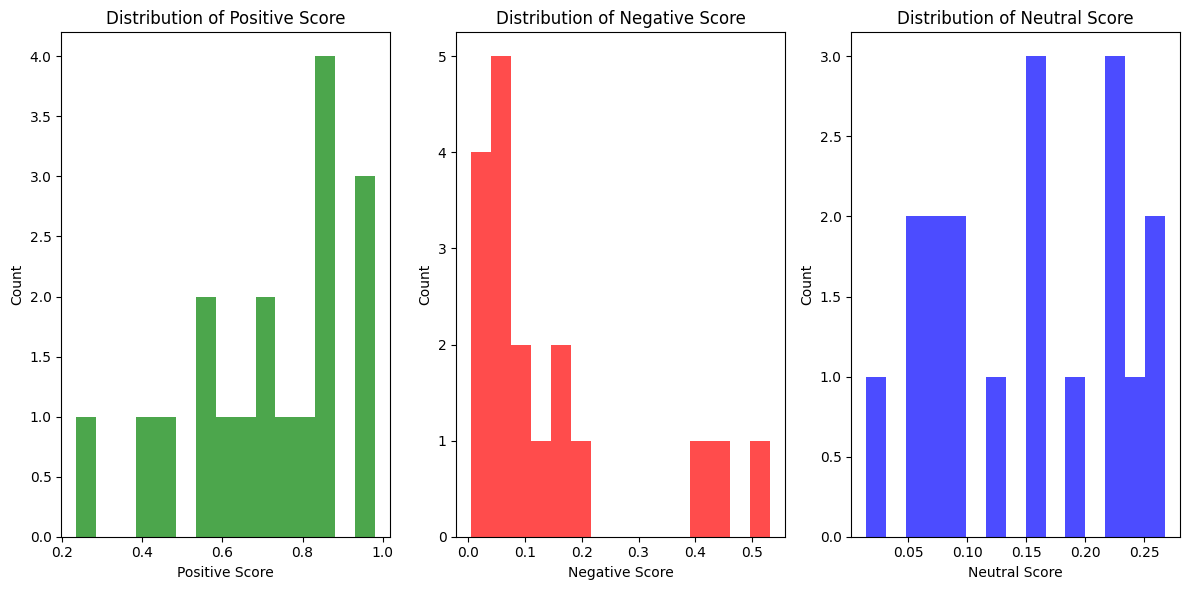

In [32]:
# Plotting the distribution of sentiment scores
plt.figure(figsize=(12, 6))

# Distribution of positive score
plt.subplot(1, 3, 1)
plt.hist(transcript_scores_df['positive'], bins=15, color='green', alpha=0.7)
plt.xlabel('Positive Score')
plt.ylabel('Count')
plt.title('Distribution of Positive Score')

# Distribution of negative score
plt.subplot(1, 3, 2)
plt.hist(transcript_scores_df['negative'], bins=15, color='red', alpha=0.7)
plt.xlabel('Negative Score')
plt.ylabel('Count')
plt.title('Distribution of Negative Score')

# Distribution of neutral score
plt.subplot(1, 3, 3)
plt.hist(transcript_scores_df['neutral'], bins=15, color='blue', alpha=0.7)
plt.xlabel('Neutral Score')
plt.ylabel('Count')
plt.title('Distribution of Neutral Score')

plt.tight_layout()
plt.show()

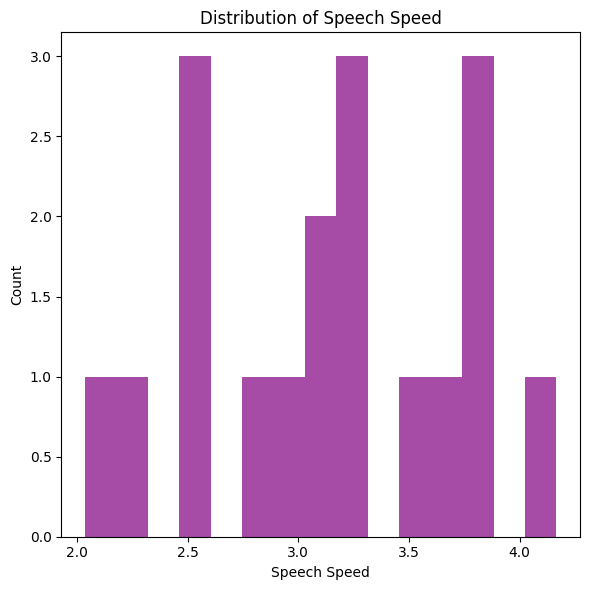

In [33]:
# Plotting the distribution of speech_speed
plt.figure(figsize=(6, 6))

# Distribution of speech_speed
plt.hist(transcript_scores_df['speech_speed'], bins=15, color='purple', alpha=0.7)
plt.xlabel('Speech Speed')
plt.ylabel('Count')
plt.title('Distribution of Speech Speed')

plt.tight_layout()
plt.show()

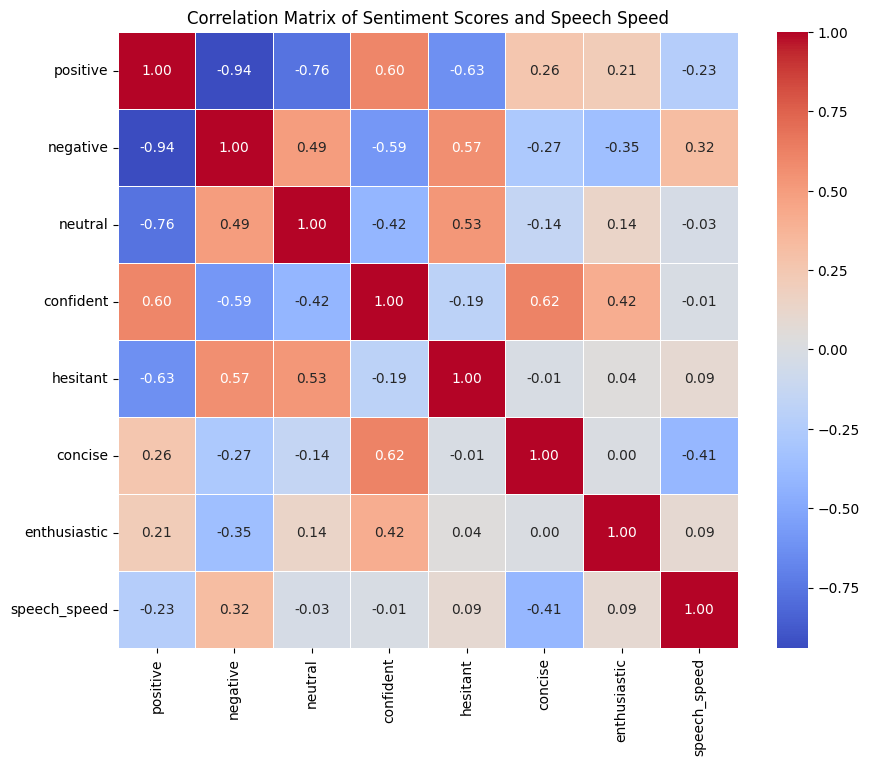

In [34]:
# Calculate the correlation matrix
correlation_matrix = transcript_scores_df[['positive', 'negative', 'neutral', 'confident', 'hesitant', 'concise', 'enthusiastic', 'speech_speed']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Sentiment Scores and Speech Speed')
plt.show()

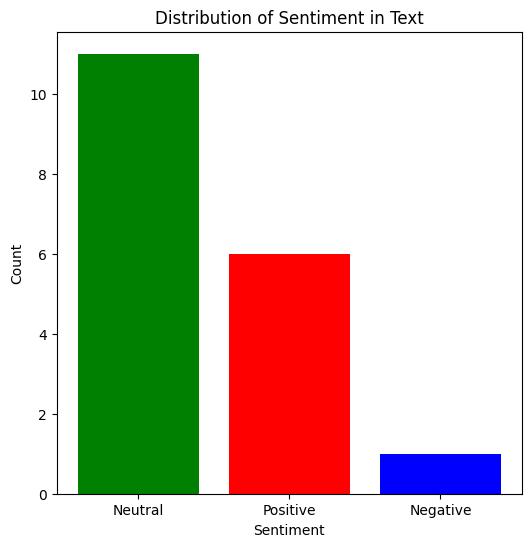

In [36]:
from textblob import TextBlob

# Function to perform sentiment analysis
def get_sentiment(text):
    analysis = TextBlob(text)
    # Classify the polarity of the text
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to the 'text' column
transcript_scores_df['sentiment'] = transcript_scores_df['text'].apply(get_sentiment)

# Count the occurrences of each sentiment
sentiment_counts = transcript_scores_df['sentiment'].value_counts()

# Plot the distribution of sentiments
plt.figure(figsize=(6, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red', 'blue'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiment in Text')
plt.show()

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


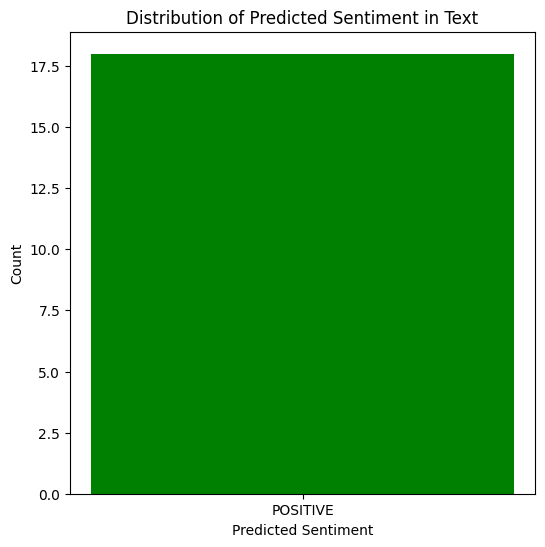

In [39]:
from transformers import pipeline

# Create a sentiment analysis pipeline
sentiment_analysis = pipeline('sentiment-analysis')

# Function to apply sentiment analysis to a given text
def analyze_sentiment_with_pipeline(text):
    result = sentiment_analysis(text)
    return result[0]['label']

# Apply sentiment analysis using the pipeline to the 'text' column
transcript_scores_df['predicted_sentiment'] = transcript_scores_df['text'].apply(analyze_sentiment_with_pipeline)

# Count the occurrences of each predicted sentiment
predicted_sentiment_counts = transcript_scores_df['predicted_sentiment'].value_counts()

# Plot the distribution of predicted sentiments
plt.figure(figsize=(6, 6))
plt.bar(predicted_sentiment_counts.index, predicted_sentiment_counts.values, color=['green', 'red'])
plt.xlabel('Predicted Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Predicted Sentiment in Text')
plt.show()